In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Process Combined Features

In [2]:
img_feats = pd.read_csv(
    './../../../data_source/to_analysis/radiomics_features.csv', 
    index_col=0
)
img_feats.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxis,original_shape_Sphericity,...,PET original_gldm_SmallDependenceHighGrayLevelEmphasis,PET original_gldm_SmallDependenceLowGrayLevelEmphasis,PET original_ngtdm_Busyness,PET original_ngtdm_Coarseness,PET original_ngtdm_Complexity,PET original_ngtdm_Contrast,PET original_ngtdm_Strength,PET SUVpeak,PET MTV,PET TLG
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,41.976184,44.598206,42.720019,45.617979,27.619612,0.661532,...,5.519092,0.000475,2.427090,0.001254,48.302361,0.061505,0.456285,21.616549,7.384,124.870726
4,0.796900,0.629917,19.845151,31.504408,38.587563,35.468296,29.410882,38.704005,25.105855,0.701721,...,6.131197,0.000615,1.658665,0.002416,53.140323,0.084396,0.697578,15.296275,3.406,41.554406
5,0.600926,0.535140,22.515072,42.073251,46.065171,43.011626,32.015621,46.454279,25.282894,0.762365,...,5.047617,0.000795,2.297591,0.001332,39.715808,0.057499,0.450344,14.473272,7.934,86.228420
8,0.784571,0.414247,30.263897,73.057649,74.148500,80.956779,65.764732,83.438600,57.318945,0.520001,...,3.684029,0.000522,9.430757,0.000576,40.275824,0.063654,0.098864,10.510859,26.926,205.413389
10,0.690320,0.539743,19.449801,36.035312,33.286634,38.013156,33.015148,43.150898,24.875896,0.643822,...,4.875052,0.000603,1.643871,0.002969,51.761539,0.057269,0.473581,7.213190,6.041,32.103770


In [3]:
img_feats.shape

(198, 199)

In [4]:
clinical = pd.read_csv(
    './../../../data_source/to_analysis/clinical_params.csv', 
    index_col=0
)
clinical.head()

,Age,Years Smoking,Naxogin Days,Sex_M,ICD-10_C02,ICD-10_C03,ICD-10_C04,ICD-10_C05,ICD-10_C06,ICD-10_C09,...,Cisplatin_1,Cisplatin_2,Cisplatin_3,Cisplatin_4,Cisplatin_5,Cisplatin_6,Stage 1,Stage 2,Stage 3,Stage 4
patient,,,,,,,,,,,,,,,,,,,,,
2,60.832877,0.000000,39.0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,49.906849,4.786027,33.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
5,54.238356,0.000000,42.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,54.687671,18.343836,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
10,61.728767,0.000000,35.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [5]:
clinical.shape

(198, 42)

In [6]:
combined = pd.concat((img_feats, clinical), axis=1)

In [7]:
combined.shape

(198, 241)

In [8]:
# Sanity check for missing values.
combined.isnull().any().values.sum()

0

In [9]:
combined.to_csv('./../../../data_source/to_analysis/complete.csv')

## Feature Decorrelation

In [10]:
# Correlation matrix
corr_mat = combined.corr().abs()

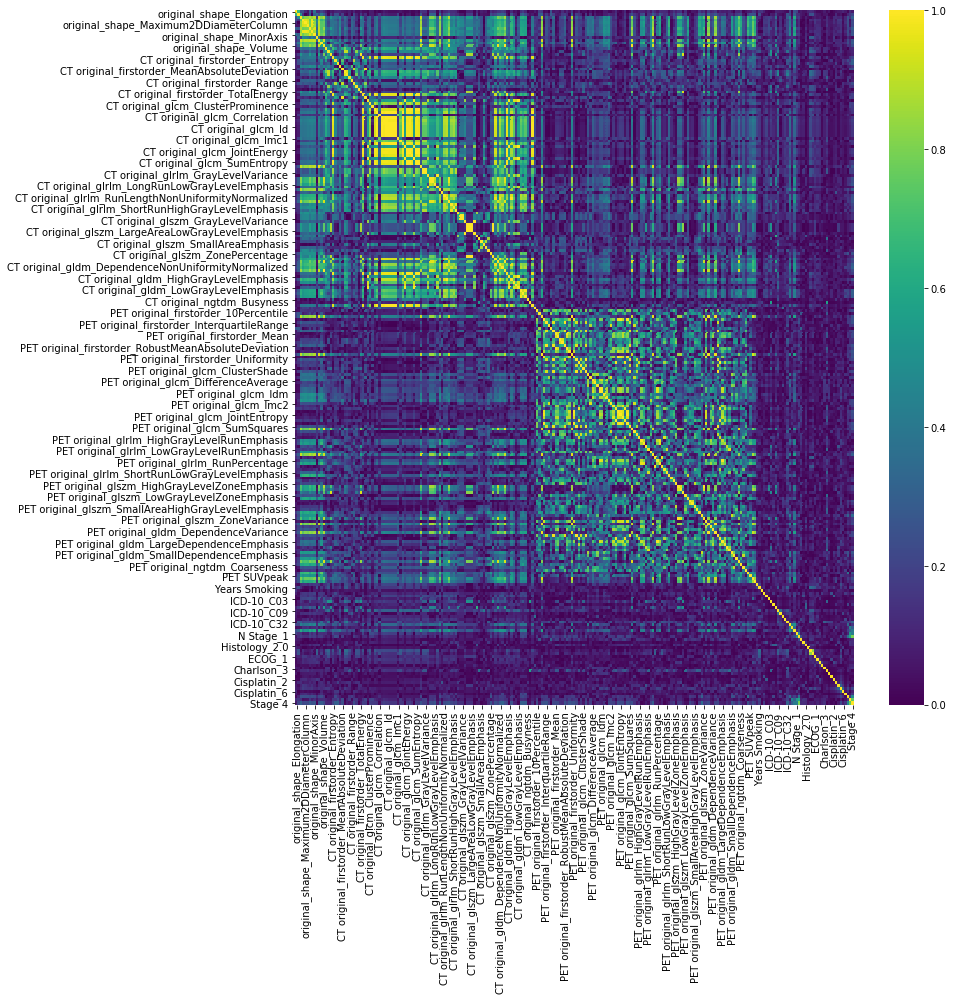

In [12]:
plt.figure(figsize=(14, 14))
axis = sns.heatmap(
    corr_mat, cmap=plt.cm.viridis, #xticklabels='', yticklabels=''
)
plt.tight_layout()
plt.savefig(
    './../../../figures/feature_covar_mat.png',
    bbox_inches='tight',
    transparent=True,
    dpi=400, 
)

In [13]:
# Find index of feature columns with correlation greater than thresh
THRESH = 0.80

# Compute pairwise pearson correlation of columns
upper = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > THRESH)]
len(to_drop)

144

In [14]:
to_drop

['original_shape_Maximum2DDiameterColumn',
 'original_shape_Maximum2DDiameterRow',
 'original_shape_Maximum2DDiameterSlice',
 'original_shape_Maximum3DDiameter',
 'original_shape_MinorAxis',
 'original_shape_SurfaceArea',
 'original_shape_SurfaceVolumeRatio',
 'original_shape_Volume',
 'CT original_firstorder_Mean',
 'CT original_firstorder_Median',
 'CT original_firstorder_RobustMeanAbsoluteDeviation',
 'CT original_firstorder_RootMeanSquared',
 'CT original_firstorder_TotalEnergy',
 'CT original_firstorder_Uniformity',
 'CT original_firstorder_Variance',
 'CT original_glcm_ClusterProminence',
 'CT original_glcm_ClusterTendency',
 'CT original_glcm_Contrast',
 'CT original_glcm_DifferenceAverage',
 'CT original_glcm_DifferenceEntropy',
 'CT original_glcm_DifferenceVariance',
 'CT original_glcm_Id',
 'CT original_glcm_Idm',
 'CT original_glcm_Idmn',
 'CT original_glcm_Idn',
 'CT original_glcm_Imc2',
 'CT original_glcm_InverseVariance',
 'CT original_glcm_JointAverage',
 'CT original_gl

In [15]:
def radional_difference(original, num, denom):
    # Rational difference feature transformation.
    num_feat = combined[num[0]]
    for feat in num[1:]:
        num_feat -= original[feat]

    denom_feat = original[denom[0]]
    for feat in denom[1:]:
        denom_feat -= original[feat]
    
    return num_feat / denom_feat

In [16]:
num, denom = to_drop[:int(len(to_drop) / 2)], to_drop[int(len(to_drop) / 2):]
len(num) + len(denom), len(to_drop)

(144, 144)

In [17]:
combined['forward_corr'] = radional_difference(combined, num, denom)

In [18]:
combined.shape

(198, 242)

In [19]:
combined.drop(to_drop, axis=1, inplace=True)

In [20]:
combined.shape

(198, 98)

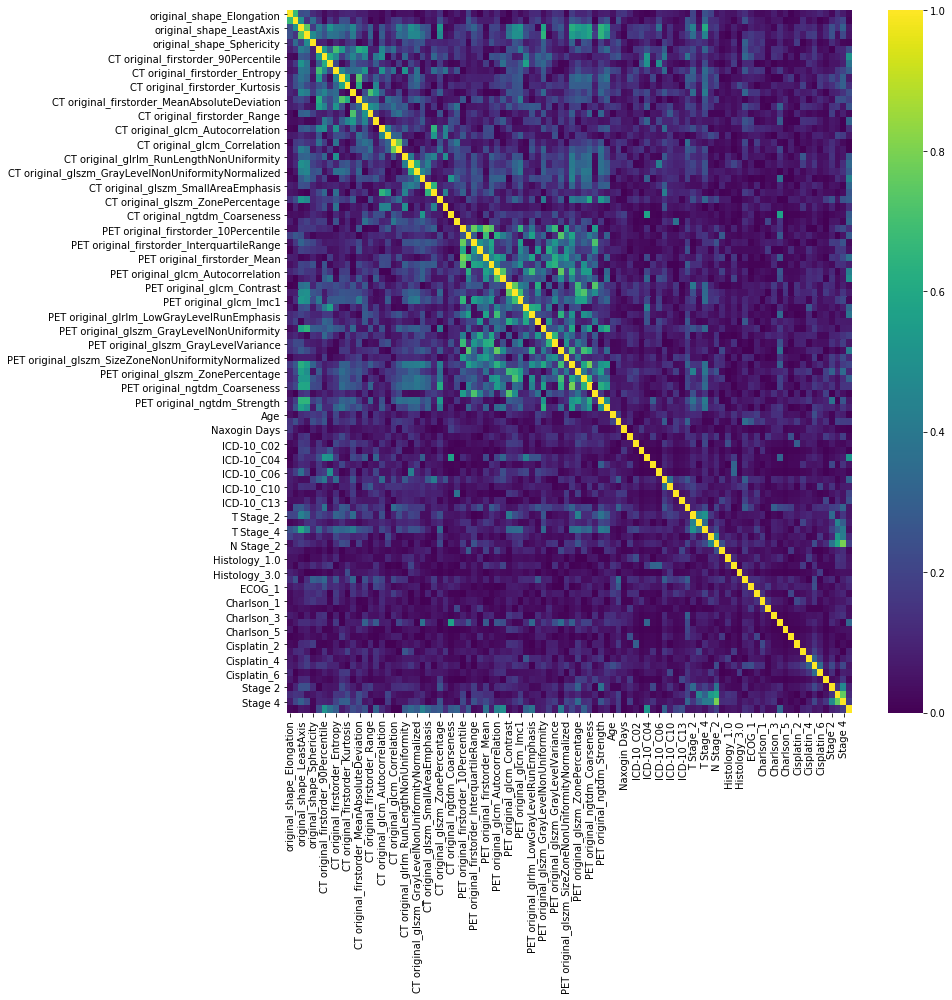

In [22]:
# Correlation matrix
corr_mat = combined.corr().abs()
plt.figure(figsize=(14, 14))
axis = sns.heatmap(
    corr_mat, cmap=plt.cm.viridis, #xticklabels='', yticklabels=''
)
plt.tight_layout()
plt.savefig(
    './../../../figures/filtered_feature_covar_mat.png',
    bbox_inches='tight',
    transparent=True,
    dpi=400, 
)

In [23]:
combined.to_csv('./../../../data_source/to_analysis/complete_decorr.csv')